# Import and Install Dependencies

In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib pyttsx3

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import pyttsx3

# Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Bütünsel model
mp_drawing = mp.solutions.drawing_utils # Çizim yardımcı programları

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR formatından RGB formatına dönüştür
    image.flags.writeable = False                  # Görüntü artık yazılamaz
    results = model.process(image)                 # Görüntü üzerinde tahmin
    image.flags.writeable = True                   # Görüntü artık yazılabilir 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # BGR formatına geri çevir
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Yüz üzerindeki noktalar
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Vücut üzerindeki noktalar
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Sol el üzerindeki noktalar
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Sağ el üzerindeki noktalar

In [6]:
def draw_styled_landmarks(image, results):
    # Yüz bağlantılarını çizin
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Poz bağlantılarını çizin
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Sol el bağlantılarını çizin
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Sağ el bağlantılarını çizin  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
    cap = cv2.VideoCapture(0)
    # mediapipe modelini ayarlayın 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():

            # Görüntü akışını oku
            ret, frame = cap.read()

            # Tespit edilen sonuçları döndür
            image, results = mediapipe_detection(frame, holistic)
            print(results)

            # Görüntü üzerinde tespit edilen noktaları çiz
            draw_styled_landmarks(image, results)

            # Kareyi yatay olarak ters çevir
            image = cv2.flip(image, 1)

            # Ekrana göster
            cv2.imshow('OpenCV Feed', image)

            # Akışı durdur
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()

C:\Users\mega_\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.right_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

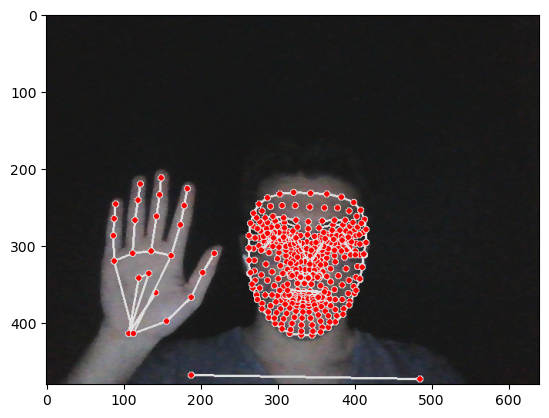

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [12]:
len(results.right_hand_landmarks.landmark)

21

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)

IndentationError: unexpected indent (3987811915.py, line 2)

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.53515929,  0.6758855 , -1.40224099, ...,  0.14151233,
        0.51356328, -0.04267474])

In [19]:
468*3+33*4+21*3+21*3

1662

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.53515929,  0.6758855 , -1.40224099, ...,  0.14151233,
        0.51356328, -0.04267474])

# Setup Folders for Collection

In [22]:
# İşaret dilindeki hareketlerin kaydedileceği klasör yolu, numpy dizileri
DATA_PATH = os.path.join('MP_Data') 

# actions: Tanıyacağımız hareketlerin bir listesi. Burada 'merhaba', 'teşekkürederim' ve 'seniseviyorum' kelimeleri kullanıldı
actions = np.array(['merhaba', 'teşekkürederim', 'evet'])

# Her hareket için 30 video çekilecek
no_sequences = 30

# Her video 30 kareden oluşacak
sequence_length = 30

In [23]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing

In [24]:
cap = cv2.VideoCapture(0)
# mediapipe modelini ayarla 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Her hareket için, her video ve her kareyi döngüyle işler. Her karede vücut, yüz ve eller için keypoint'ler algılanır.
    # Action'lar arasında döngü yap
    for action in actions:
        # # Videolar olarak da bilinen diziler arasında döngü yapın 
        for sequence in range(no_sequences):
            # Video uzunluğu, diğer adıyla dizi uzunluğu arasında geçiş yap
            for frame_num in range(sequence_length):

                # Görüntü akışını oku
                ret, frame = cap.read()

                # Tespit edilen sonuçları döndür
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Yer işaretlerini çizin
                draw_styled_landmarks(image, results)
                
                # Bekleme mantığını uygula
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Ekrana göster
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    # Kareyi yatay olarak ters çevir
                    image = cv2.flip(image, 1)
            
                    # Ekrana göster
                    cv2.imshow('OpenCV Feed', image)
                
                # Anahtar noktaları dışa aktar (Her kare için keypoint verilerini .npy dosyalarına kaydet)
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Akışı durdur
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [25]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [27]:
label_map = {label:num for num, label in enumerate(actions)}

In [28]:
label_map

{'merhaba': 0, 'teşekkürederim': 1, 'evet': 2}

In [29]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [30]:
np.array(sequences).shape

(90, 30, 1662)

In [31]:
np.array(labels).shape

(90,)

In [32]:
X = np.array(sequences)

In [33]:
X.shape

(90, 30, 1662)

In [34]:
y = to_categorical(labels).astype(int)

In [35]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_test.shape

(5, 3)

# Build and Train LSTM Neural Network

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [39]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [40]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [41]:
res = [.7, 0.2, 0.1]

In [42]:
actions[np.argmax(res)]

'merhaba'

In [43]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [44]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 72ms/step - loss: 1.1352 - categorical_accuracy: 0.3882
Epoch 2/2000
3/3 [==============================] - 0s 71ms/step - loss: 4.0896 - categorical_accuracy: 0.4353
Epoch 3/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.7927 - categorical_accuracy: 0.2588
Epoch 4/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.2937 - categorical_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 67ms/step - loss: 5.8391 - categorical_accuracy: 0.4471
Epoch 6/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.4998 - categorical_accuracy: 0.3647
Epoch 7/2000
3/3 [==============================] - 0s 75ms/step - loss: 12.2012 - categorical_accuracy: 0.3294
Epoch 8/2000
3/3 [==============================] - 0s 68ms/step - loss: 11.4571 - categorical_accuracy: 0.4471
Epoch 9/2000
3/3 [==============================] - 0s 68ms/step - loss: 12.9755 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 69ms/step - loss: 10.0681 - categorical_accuracy: 0.4000
Epoch 75/2000
3/3 [==============================] - 0s 70ms/step - loss: 108.6720 - categorical_accuracy: 0.3412
Epoch 76/2000
3/3 [==============================] - 0s 69ms/step - loss: 251.7086 - categorical_accuracy: 0.3765
Epoch 77/2000
3/3 [==============================] - 0s 68ms/step - loss: 218.6568 - categorical_accuracy: 0.3294
Epoch 78/2000
3/3 [==============================] - 0s 68ms/step - loss: 250.5772 - categorical_accuracy: 0.3882
Epoch 79/2000
3/3 [==============================] - 0s 69ms/step - loss: 101.6229 - categorical_accuracy: 0.2706
Epoch 80/2000
3/3 [==============================] - 0s 73ms/step - loss: 43.8464 - categorical_accuracy: 0.3647
Epoch 81/2000
3/3 [==============================] - 0s 69ms/step - loss: 31.6460 - categorical_accuracy: 0.3176
Epoch 82/2000
3/3 [==============================] - 0s 69ms/step - loss: 133.0701 - categorical_accuracy

3/3 [==============================] - 0s 70ms/step - loss: 0.9517 - categorical_accuracy: 0.4824
Epoch 147/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.8329 - categorical_accuracy: 0.5647
Epoch 148/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.8345 - categorical_accuracy: 0.4824
Epoch 149/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.7925 - categorical_accuracy: 0.5529
Epoch 150/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7363 - categorical_accuracy: 0.5647
Epoch 151/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.7647 - categorical_accuracy: 0.4941
Epoch 152/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7305 - categorical_accuracy: 0.6471
Epoch 153/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.7559 - categorical_accuracy: 0.4824
Epoch 154/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7218 - categorical_accuracy: 0.552

3/3 [==============================] - 0s 78ms/step - loss: 0.5844 - categorical_accuracy: 0.6941
Epoch 219/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.5300 - categorical_accuracy: 0.7059
Epoch 220/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4834 - categorical_accuracy: 0.7529
Epoch 221/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.4933 - categorical_accuracy: 0.7176
Epoch 222/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.5590 - categorical_accuracy: 0.7412
Epoch 223/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.5593 - categorical_accuracy: 0.7529
Epoch 224/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6443 - categorical_accuracy: 0.6353
Epoch 225/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6376 - categorical_accuracy: 0.6941
Epoch 226/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.5407 - categorical_accuracy: 0.729

3/3 [==============================] - 0s 85ms/step - loss: 0.9030 - categorical_accuracy: 0.6706
Epoch 291/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.8473 - categorical_accuracy: 0.6588
Epoch 292/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.1160 - categorical_accuracy: 0.5882
Epoch 293/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.7947 - categorical_accuracy: 0.7176
Epoch 294/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.4718 - categorical_accuracy: 0.7294
Epoch 295/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.6185 - categorical_accuracy: 0.7294
Epoch 296/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.5633 - categorical_accuracy: 0.7294
Epoch 297/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.5497 - categorical_accuracy: 0.7647
Epoch 298/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.3982 - categorical_accuracy: 0.788

3/3 [==============================] - 0s 73ms/step - loss: 0.3243 - categorical_accuracy: 0.8588
Epoch 363/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.2774 - categorical_accuracy: 0.8941
Epoch 364/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4210 - categorical_accuracy: 0.8118
Epoch 365/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.3110 - categorical_accuracy: 0.9059
Epoch 366/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.2610 - categorical_accuracy: 0.9294
Epoch 367/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.3450 - categorical_accuracy: 0.8471
Epoch 368/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.3937 - categorical_accuracy: 0.8353
Epoch 369/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2363 - categorical_accuracy: 0.9412
Epoch 370/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.2891 - categorical_accuracy: 0.882

3/3 [==============================] - 0s 84ms/step - loss: 0.2269 - categorical_accuracy: 0.9294
Epoch 435/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2222 - categorical_accuracy: 0.9412
Epoch 436/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.2049 - categorical_accuracy: 0.9176
Epoch 437/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.2220 - categorical_accuracy: 0.9176
Epoch 438/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.2172 - categorical_accuracy: 0.9294
Epoch 439/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.2953 - categorical_accuracy: 0.8941
Epoch 440/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.3644 - categorical_accuracy: 0.8706
Epoch 441/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.4055 - categorical_accuracy: 0.8000
Epoch 442/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2519 - categorical_accuracy: 0.894

3/3 [==============================] - 0s 81ms/step - loss: 0.5115 - categorical_accuracy: 0.8000
Epoch 507/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.2809 - categorical_accuracy: 0.8941
Epoch 508/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.2242 - categorical_accuracy: 0.9294
Epoch 509/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1928 - categorical_accuracy: 0.9176
Epoch 510/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.2527 - categorical_accuracy: 0.9059
Epoch 511/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.2618 - categorical_accuracy: 0.9059
Epoch 512/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.2088 - categorical_accuracy: 0.9059
Epoch 513/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.3261 - categorical_accuracy: 0.8706
Epoch 514/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.3315 - categorical_accuracy: 0.858

3/3 [==============================] - 0s 76ms/step - loss: 0.1286 - categorical_accuracy: 0.9647
Epoch 579/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1533 - categorical_accuracy: 0.9647
Epoch 580/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1230 - categorical_accuracy: 0.9529
Epoch 581/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1379 - categorical_accuracy: 0.9647
Epoch 582/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1067 - categorical_accuracy: 0.9529
Epoch 583/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1353 - categorical_accuracy: 0.9647
Epoch 584/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1282 - categorical_accuracy: 0.9412
Epoch 585/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1512 - categorical_accuracy: 0.9294
Epoch 586/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1184 - categorical_accuracy: 0.941

3/3 [==============================] - 0s 86ms/step - loss: 0.5874 - categorical_accuracy: 0.7882
Epoch 651/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.6696 - categorical_accuracy: 0.6118
Epoch 652/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.5241 - categorical_accuracy: 0.7412
Epoch 653/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.4432 - categorical_accuracy: 0.8118
Epoch 654/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.6395 - categorical_accuracy: 0.7882
Epoch 655/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.9960 - categorical_accuracy: 0.6353
Epoch 656/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.5443 - categorical_accuracy: 0.7647
Epoch 657/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.9025 - categorical_accuracy: 0.7294
Epoch 658/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.4331 - categorical_accuracy: 0.588

3/3 [==============================] - 0s 75ms/step - loss: 0.3748 - categorical_accuracy: 0.8353
Epoch 723/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.3020 - categorical_accuracy: 0.9059
Epoch 724/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.3008 - categorical_accuracy: 0.8706
Epoch 725/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.3227 - categorical_accuracy: 0.8353
Epoch 726/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.3161 - categorical_accuracy: 0.8706
Epoch 727/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.3124 - categorical_accuracy: 0.8706
Epoch 728/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.2646 - categorical_accuracy: 0.9059
Epoch 729/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.2462 - categorical_accuracy: 0.9059
Epoch 730/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.3523 - categorical_accuracy: 0.858

3/3 [==============================] - 0s 78ms/step - loss: 0.1561 - categorical_accuracy: 0.9647
Epoch 795/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.1724 - categorical_accuracy: 0.9412
Epoch 796/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1921 - categorical_accuracy: 0.9176
Epoch 797/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1918 - categorical_accuracy: 0.9176
Epoch 798/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1689 - categorical_accuracy: 0.9294
Epoch 799/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1919 - categorical_accuracy: 0.9294
Epoch 800/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.2043 - categorical_accuracy: 0.9059
Epoch 801/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.2007 - categorical_accuracy: 0.9529
Epoch 802/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1280 - categorical_accuracy: 0.964

3/3 [==============================] - 0s 81ms/step - loss: 0.1410 - categorical_accuracy: 0.9412
Epoch 867/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.3424 - categorical_accuracy: 0.9059
Epoch 868/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.5005 - categorical_accuracy: 0.8353
Epoch 869/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.8035 - categorical_accuracy: 0.7412
Epoch 870/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.4713 - categorical_accuracy: 0.8000
Epoch 871/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.2258 - categorical_accuracy: 0.9059
Epoch 872/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.1604 - categorical_accuracy: 0.9529
Epoch 873/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.2853 - categorical_accuracy: 0.9176
Epoch 874/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2536 - categorical_accuracy: 0.905

3/3 [==============================] - 0s 76ms/step - loss: 0.0498 - categorical_accuracy: 0.9765
Epoch 939/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.0498 - categorical_accuracy: 0.9882
Epoch 940/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0449 - categorical_accuracy: 0.9882
Epoch 941/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0470 - categorical_accuracy: 0.9882
Epoch 942/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0431 - categorical_accuracy: 0.9882
Epoch 943/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0692 - categorical_accuracy: 0.9765
Epoch 944/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0623 - categorical_accuracy: 0.9765
Epoch 945/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0583 - categorical_accuracy: 0.9765
Epoch 946/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0769 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 75ms/step - loss: 0.2739 - categorical_accuracy: 0.8588
Epoch 1011/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.3567 - categorical_accuracy: 0.8588
Epoch 1012/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.3543 - categorical_accuracy: 0.8706
Epoch 1013/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1456 - categorical_accuracy: 0.9529
Epoch 1014/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.3419 - categorical_accuracy: 0.8588
Epoch 1015/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.2670 - categorical_accuracy: 0.8706
Epoch 1016/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1788 - categorical_accuracy: 0.9294
Epoch 1017/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1873 - categorical_accuracy: 0.9059
Epoch 1018/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1376 - categorical_accurac

3/3 [==============================] - 0s 78ms/step - loss: 0.1768 - categorical_accuracy: 0.9529
Epoch 1083/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2273 - categorical_accuracy: 0.8588
Epoch 1084/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1593 - categorical_accuracy: 0.9412
Epoch 1085/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2438 - categorical_accuracy: 0.8824
Epoch 1086/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1614 - categorical_accuracy: 0.9059
Epoch 1087/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.3225 - categorical_accuracy: 0.8706
Epoch 1088/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.2232 - categorical_accuracy: 0.8824
Epoch 1089/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1421 - categorical_accuracy: 0.9647
Epoch 1090/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1384 - categorical_accurac

3/3 [==============================] - 0s 80ms/step - loss: 0.1912 - categorical_accuracy: 0.9412
Epoch 1155/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2111 - categorical_accuracy: 0.9059
Epoch 1156/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.3869 - categorical_accuracy: 0.8941
Epoch 1157/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.3185 - categorical_accuracy: 0.8941
Epoch 1158/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.3425 - categorical_accuracy: 0.8706
Epoch 1159/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.3134 - categorical_accuracy: 0.8706
Epoch 1160/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2044 - categorical_accuracy: 0.9176
Epoch 1161/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1839 - categorical_accuracy: 0.9294
Epoch 1162/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.2947 - categorical_accurac

3/3 [==============================] - 0s 85ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 1227/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 1228/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 1229/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 1230/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 1231/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 1232/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 1233/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 1234/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0061 - categorical_accurac

3/3 [==============================] - 0s 77ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 1299/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0036 - categorical_accuracy: 1.0000
Epoch 1300/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 1301/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 1302/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 1303/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 1304/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 1305/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0034 - categorical_accuracy: 1.0000
Epoch 1306/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0034 - categorical_accurac

3/3 [==============================] - 0s 76ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 1371/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 1372/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 1373/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 1374/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 1375/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 1376/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 1377/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 1378/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0024 - categorical_accurac

3/3 [==============================] - 0s 75ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1443/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1444/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1445/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1446/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1447/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1448/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1449/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1450/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0018 - categorical_accurac

Epoch 1514/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1515/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1516/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1517/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1518/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1519/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1520/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1521/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1522/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0014 - cat

3/3 [==============================] - 0s 86ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1586/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1587/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1588/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1589/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1590/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1591/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1592/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1593/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0011 - categorical_accurac

3/3 [==============================] - 0s 80ms/step - loss: 9.1528e-04 - categorical_accuracy: 1.0000
Epoch 1656/2000
3/3 [==============================] - 0s 81ms/step - loss: 9.0929e-04 - categorical_accuracy: 1.0000
Epoch 1657/2000
3/3 [==============================] - 0s 85ms/step - loss: 9.1000e-04 - categorical_accuracy: 1.0000
Epoch 1658/2000
3/3 [==============================] - 0s 82ms/step - loss: 9.0063e-04 - categorical_accuracy: 1.0000
Epoch 1659/2000
3/3 [==============================] - 0s 80ms/step - loss: 8.9248e-04 - categorical_accuracy: 1.0000
Epoch 1660/2000
3/3 [==============================] - 0s 81ms/step - loss: 8.9798e-04 - categorical_accuracy: 1.0000
Epoch 1661/2000
3/3 [==============================] - 0s 83ms/step - loss: 8.9803e-04 - categorical_accuracy: 1.0000
Epoch 1662/2000
3/3 [==============================] - 0s 84ms/step - loss: 8.9637e-04 - categorical_accuracy: 1.0000
Epoch 1663/2000
3/3 [==============================] - 0s 82ms/step - lo

3/3 [==============================] - 0s 83ms/step - loss: 7.3025e-04 - categorical_accuracy: 1.0000
Epoch 1725/2000
3/3 [==============================] - 0s 82ms/step - loss: 7.2083e-04 - categorical_accuracy: 1.0000
Epoch 1726/2000
3/3 [==============================] - 0s 87ms/step - loss: 7.1474e-04 - categorical_accuracy: 1.0000
Epoch 1727/2000
3/3 [==============================] - 0s 87ms/step - loss: 7.2710e-04 - categorical_accuracy: 1.0000
Epoch 1728/2000
3/3 [==============================] - 0s 83ms/step - loss: 7.2477e-04 - categorical_accuracy: 1.0000
Epoch 1729/2000
3/3 [==============================] - 0s 90ms/step - loss: 7.2057e-04 - categorical_accuracy: 1.0000
Epoch 1730/2000
3/3 [==============================] - 0s 92ms/step - loss: 7.1037e-04 - categorical_accuracy: 1.0000
Epoch 1731/2000
3/3 [==============================] - 0s 88ms/step - loss: 7.1071e-04 - categorical_accuracy: 1.0000
Epoch 1732/2000
3/3 [==============================] - 0s 84ms/step - lo

3/3 [==============================] - 0s 83ms/step - loss: 5.8814e-04 - categorical_accuracy: 1.0000
Epoch 1794/2000
3/3 [==============================] - 0s 84ms/step - loss: 5.8687e-04 - categorical_accuracy: 1.0000
Epoch 1795/2000
3/3 [==============================] - 0s 86ms/step - loss: 5.8631e-04 - categorical_accuracy: 1.0000
Epoch 1796/2000
3/3 [==============================] - 0s 86ms/step - loss: 5.8291e-04 - categorical_accuracy: 1.0000
Epoch 1797/2000
3/3 [==============================] - 0s 87ms/step - loss: 5.8661e-04 - categorical_accuracy: 1.0000
Epoch 1798/2000
3/3 [==============================] - 0s 83ms/step - loss: 5.8603e-04 - categorical_accuracy: 1.0000
Epoch 1799/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.8391e-04 - categorical_accuracy: 1.0000
Epoch 1800/2000
3/3 [==============================] - 0s 87ms/step - loss: 5.7489e-04 - categorical_accuracy: 1.0000
Epoch 1801/2000
3/3 [==============================] - 0s 83ms/step - lo

3/3 [==============================] - 0s 85ms/step - loss: 4.5069e-04 - categorical_accuracy: 1.0000
Epoch 1863/2000
3/3 [==============================] - 0s 87ms/step - loss: 4.4960e-04 - categorical_accuracy: 1.0000
Epoch 1864/2000
3/3 [==============================] - 0s 96ms/step - loss: 4.4409e-04 - categorical_accuracy: 1.0000
Epoch 1865/2000
3/3 [==============================] - 0s 94ms/step - loss: 4.4316e-04 - categorical_accuracy: 1.0000
Epoch 1866/2000
3/3 [==============================] - 0s 81ms/step - loss: 4.4161e-04 - categorical_accuracy: 1.0000
Epoch 1867/2000
3/3 [==============================] - 0s 90ms/step - loss: 4.4218e-04 - categorical_accuracy: 1.0000
Epoch 1868/2000
3/3 [==============================] - 0s 81ms/step - loss: 4.3172e-04 - categorical_accuracy: 1.0000
Epoch 1869/2000
3/3 [==============================] - 0s 82ms/step - loss: 4.4149e-04 - categorical_accuracy: 1.0000
Epoch 1870/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 84ms/step - loss: 3.4780e-04 - categorical_accuracy: 1.0000
Epoch 1932/2000
3/3 [==============================] - 0s 82ms/step - loss: 3.4974e-04 - categorical_accuracy: 1.0000
Epoch 1933/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.4332e-04 - categorical_accuracy: 1.0000
Epoch 1934/2000
3/3 [==============================] - 0s 85ms/step - loss: 3.4158e-04 - categorical_accuracy: 1.0000
Epoch 1935/2000
3/3 [==============================] - 0s 85ms/step - loss: 3.4053e-04 - categorical_accuracy: 1.0000
Epoch 1936/2000
3/3 [==============================] - 0s 83ms/step - loss: 3.4018e-04 - categorical_accuracy: 1.0000
Epoch 1937/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.3701e-04 - categorical_accuracy: 1.0000
Epoch 1938/2000
3/3 [==============================] - 0s 84ms/step - loss: 3.3333e-04 - categorical_accuracy: 1.0000
Epoch 1939/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 86ms/step - loss: 2.7221e-04 - categorical_accuracy: 1.0000


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

# Make Predictions

In [46]:
res = model.predict(X_test)

1/1 [==============================] - 1s 700ms/step


In [47]:
actions[np.argmax(res[2])]

'evet'

In [48]:
actions[np.argmax(y_test[4])]

'merhaba'

# Save Weights

In [49]:
model.save('action.h5')

C:\Users\mega_\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluation using Confusion Matrix and Accuracy

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 37ms/step


In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [1, 1]],

       [[1, 1],
        [0, 3]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

0.8

# Test in Real Time

In [56]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

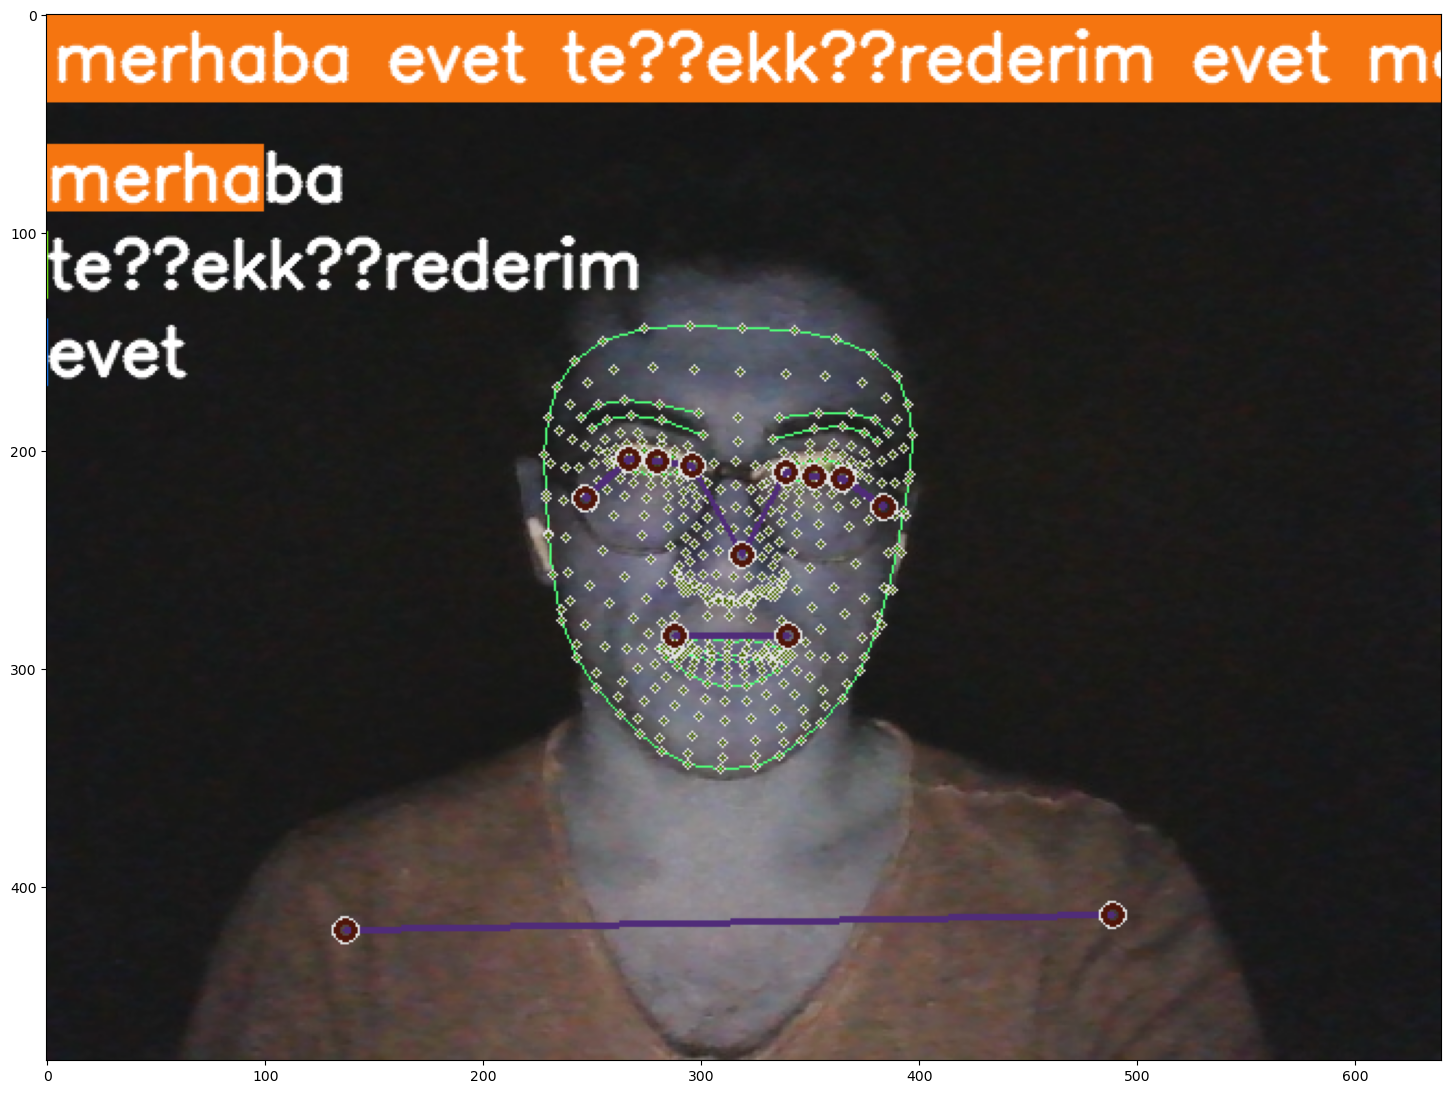

In [59]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [60]:
# 1. Kullanıcının hareketlerini tahmin etmek için gereken bazı değişkenler oluşturuldu
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# mediapipe modelini ayarla 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Akışı oku
        ret, frame = cap.read()

        # Tespit edilen sonuçları döndür
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Yer işaretlerini çiz
        draw_styled_landmarks(image, results)
        
        # 2. Keypoint Tespiti
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Görselleştirme Mantığı
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Görselleştirme ve Ekranda Gösterme
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Ekrana göster
        cv2.imshow('OpenCV Feed', image)

        # Akışı durdur
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 27ms/step
teşekkürederim
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
teşekkürederim
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
teşekkürederim
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
teşekkürederim
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
evet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
evet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
teşekkürederim
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================

1/1 [==============================] - 0s 28ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
evet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
teşekkürederim
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
teşekkürederim
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
teşekkürederim
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
teşekkürederim
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 

1/1 [==============================] - 0s 27ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
merhaba
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
merhaba
<cla

1/1 [==============================] - 0s 27ms/step
evet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
evet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
evet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
evet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
evet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
evet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
evet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
evet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
teşekkürederim
<class 'mediapipe.pyt

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [58]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequence,30,1662)

In [55]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 29ms/step


array([[0.37990442, 0.0681302 , 0.5519654 ]], dtype=float32)